In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

##classifiers

1.model
acc = 0.25
prec = 0.0625
rec = 1
F1-score = 0.018

2.model
acc = 0.93
prec = 0.4
rec = 0.8
F1-score = 0.53

### 1. Read the data

In [29]:
df = pd.read_csv('train.csv', index_col = 0)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### 2. Split the data into X and y

In [22]:
y = df['Survived']
X = df.drop(columns= ['Survived'])
X

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### 3.Split the data into train and test set

In [24]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [25]:
y


PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [27]:
X_train.shape, X_test.shape

((668, 10), (223, 10))

### 4. Feature Engineer

In [28]:
df.isna().any()

Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked     True
dtype: bool

In [30]:
X_train_engineered = X_train[['Pclass', 'SibSp']]

### 5. Build a dummy classifier

In [31]:
m_dummy = DummyClassifier(strategy='most_frequent', random_state=10)

In [36]:
m_dummy.fit(X_train_engineered, y_train)

DummyClassifier(constant=None, random_state=10, strategy='most_frequent')

In [37]:
m_dummy.predict(X_train_engineered)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### 6. Build a simple logistic regression

In [38]:
m_logistic = LogisticRegression(random_state=10)

In [39]:
m_logistic.fit(X_train_engineered, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# 1.Accuracy

In [44]:
from sklearn.metrics import accuracy_score 

In [45]:
ypred_dummy = m_dummy.predict(X_train_engineered)
accuracy_dummy = accuracy_score(y_train, ypred_dummy)
accuracy_dummy

0.6017964071856288

In [46]:
ypred_logistic = m_logistic.predict(X_train_engineered)
accuracy_logistic = accuracy_score(y_train, ypred_logistic)
accuracy_logistic

0.6661676646706587

In [47]:
m_logistic.score(X_train_engineered, y_train)

0.6661676646706587

# 2.Types of Errors and the Confusion Matrix

In [48]:
from sklearn.metrics import plot_confusion_matrix

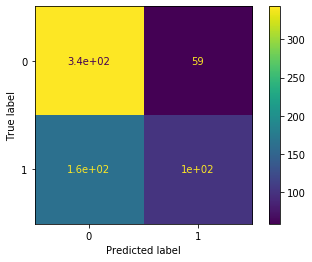

In [49]:
plot_confusion_matrix(m_logistic, X_train_engineered, y_train)

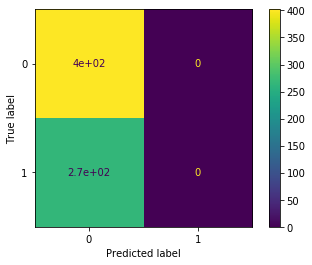

In [50]:
plot_confusion_matrix(m_dummy, X_train_engineered, y_train)

# 3.Precision

In [51]:
from sklearn.metrics import precision_score

In [54]:
precision_logistic = precision_score(y_train, ypred_logistic)
precision_logistic

0.6335403726708074

In [55]:
precision_dummy = precision_score(y_train, ypred_dummy)
precision_dummy

0.0

# 4.Recall

In [57]:
from sklearn.metrics import recall_score

In [58]:
recall_score(y_train, ypred_logistic)

0.38345864661654133

In [59]:
recall_score(y_train, ypred_dummy)

0.0

# 5.F1-Score

In [60]:
from sklearn.metrics import f1_score

In [61]:
f1_score(y_train, ypred_logistic)

0.477751756440281